# **Handling Outliers**




1.   Drop 
2.   Flag Outliers
3.   Perform a rescale transformation



# Environment settings

In [61]:
#Settings for the next examples
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#Loading datasets 
path = '/content/drive/My Drive/Colab Notebooks/Data/'
df_drinks = pd.read_csv(path + 'drinks.csv')

# 1. Identifying outliers in 'beer_servings'

Let's use as example 'beer_servings' in 'South America'

In [62]:
north_america = df_drinks['continent'] == 'South America'
df_drinks[(north_america)]['beer_servings'].min(), df_drinks[(north_america)]['beer_servings'].max()

(93, 333)

In [63]:
df_drinks[(north_america)]['beer_servings']

6      193
20     167
23     245
35     130
37     159
52     162
72      93
132    213
133    163
163    128
185    115
188    333
Name: beer_servings, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

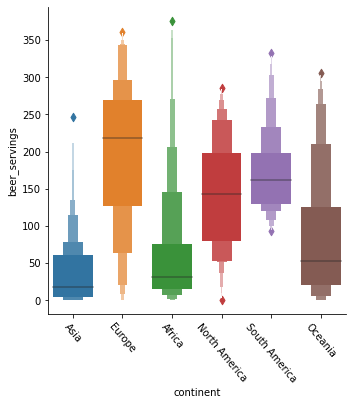

In [64]:
sns.catplot(x="continent", y="beer_servings", kind='boxen', data=df_drinks)
plt.xticks(rotation=-50)

# 2. Drop

In [65]:
#To simply , we will handle with a sample related to south america
south_america = df_drinks[(north_america)]
south_america

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,population,continent
6,Argentina,193,25,221,8.3,43085000,South America
20,Bolivia,167,41,8,3.8,11410651,South America
23,Brazil,245,145,16,7.2,207660929,South America
35,Chile,130,124,172,7.6,18006407,South America
37,Colombia,159,76,3,4.2,48336300,South America
52,Ecuador,162,74,3,4.2,16027500,South America
72,Guyana,93,302,1,7.1,746900,South America
132,Paraguay,213,117,74,7.3,7003406,South America
133,Peru,163,160,21,6.1,31151643,South America
163,Suriname,128,178,7,5.6,534189,South America


In [66]:
max = south_america['beer_servings'] ==  333
min = south_america['beer_servings'] ==  93
south_america[(min) | (max)]['beer_servings']

72      93
188    333
Name: beer_servings, dtype: int64

In [67]:
df = south_america.drop([72, 188])
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,population,continent
6,Argentina,193,25,221,8.3,43085000,South America
20,Bolivia,167,41,8,3.8,11410651,South America
23,Brazil,245,145,16,7.2,207660929,South America
35,Chile,130,124,172,7.6,18006407,South America
37,Colombia,159,76,3,4.2,48336300,South America
52,Ecuador,162,74,3,4.2,16027500,South America
132,Paraguay,213,117,74,7.3,7003406,South America
133,Peru,163,160,21,6.1,31151643,South America
163,Suriname,128,178,7,5.6,534189,South America
185,Uruguay,115,35,220,6.6,3415866,South America


# 3. Flag

In [71]:
south_america['beer_servings_outlier'] = np.where((min | max), 1, 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
#The point which is outlier ended 1, otherwise 0.
south_america

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,population,continent,beer_servings_outlier
6,Argentina,193,25,221,8.3,43085000,South America,0
20,Bolivia,167,41,8,3.8,11410651,South America,0
23,Brazil,245,145,16,7.2,207660929,South America,0
35,Chile,130,124,172,7.6,18006407,South America,0
37,Colombia,159,76,3,4.2,48336300,South America,0
52,Ecuador,162,74,3,4.2,16027500,South America,0
72,Guyana,93,302,1,7.1,746900,South America,1
132,Paraguay,213,117,74,7.3,7003406,South America,0
133,Peru,163,160,21,6.1,31151643,South America,0
163,Suriname,128,178,7,5.6,534189,South America,0


In [75]:
south_america['beer_servings_outlier'].value_counts()

0    10
1     2
Name: beer_servings_outlier, dtype: int64

# Perform a rescale transformation

In [76]:
south_america['beer_servings_log'] = [np.log(x) for x in south_america['beer_servings']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
south_america['beer_servings_log'] 

6      5.262690
20     5.117994
23     5.501258
35     4.867534
37     5.068904
52     5.087596
72     4.532599
132    5.361292
133    5.093750
163    4.852030
185    4.744932
188    5.808142
Name: beer_servings_log, dtype: float64

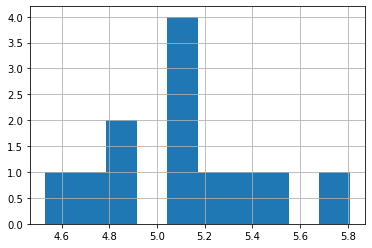

In [79]:
#Take a look at the rescaled distribuition

south_america['beer_servings_log'].hist()
plt.show()